In [31]:
import pandas as pd

# Load the dataset
df = pd.read_excel(r'C:\Users\Md Shoaib\c tutorials course\Downloads\Cancer.xlsx')

# Display the first few rows
df.head()

,Age,Gender,Tumor(T),Lymph Node (N),Metastasis (M),Grade (G),Stage,Tumor Size
0,75.65,Female,NaN,NaN,NaN,3,2,22
1,43.19,Female,NaN,NaN,NaN,3,1,10
2,48.87,Female,NaN,NaN,NaN,2,2,15
3,47.68,Female,NaN,NaN,NaN,2,2,25
4,76.97,Female,NaN,NaN,NaN,3,2,40


In [33]:
df.columns.tolist()

['Age ',
 'Gender',
 'Tumor(T)',
 'Lymph Node (N)',
 ' Metastasis (M)',
 ' Grade (G)',
 'Stage',
 'Tumor Size']

# Standardized Age


In [35]:
#Clean and Standardized Age
import numpy as np

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Define function to clean 'Age'
def clean_age(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        value = value.strip()
        if '-' in value:
            try:
                parts = value.split('-')
                nums = [float(p) for p in parts if p.strip().replace('.', '', 1).isdigit()]
                if len(nums) == 2:
                    return round(sum(nums)/2)
            except:
                return np.nan
        elif value.replace('.', '', 1).isdigit():
            return round(float(value))
        else:
            return np.nan
    elif isinstance(value, (int, float)):
        return round(value)
    return np.nan

# Apply the function to 'Age' column
if 'Age' in df.columns:
    df['Age'] = df['Age'].apply(clean_age)
else:
    print("'Age' column not found in the file.")
    print("Available columns:", df.columns.tolist())
    exit()

# Save to new Excel file
output_file = r'C:\Users\Md Shoaib\c tutorials course\Downloads\Cancer_cleaned.xlsx'
df.to_excel(output_file, index=False)

print(f"Cleaned file saved as: {output_file}")


Cleaned file saved as: C:\Users\Md Shoaib\c tutorials course\Downloads\Cancer_cleaned.xlsx


# Check Distinct Data


In [37]:
# Gender
# Convert all values to string first, then get unique values and sort
distinct_gender = sorted(df['Gender'].dropna().astype(str).unique())

print("Gender:")
for val in distinct_gender:
    print(f"- {val}")

Gender:
- Female
- Male


In [39]:
# Grade
# Convert all values to string first, then get unique values and sort
distinct_grade = sorted(df['Grade (G)'].dropna().astype(str).unique())

print("Grade:")
for val in distinct_grade:
    print(f"- {val}")

Grade:
- 1
- 2
- 3
- I LOW GRADE (WELL DIFFERENTIATED)
- I-II
- II INTERMEDIATE GRADE (MODERATELY DIFFERENTIATED)
- II-III
- III HIGH GRADE (POORLY DIFFERENTIATED)
- N/A_BLOOD_SAMPLE
- NOT_FOUND_IN_RECORD


In [41]:
# Stage
# Convert all values to string first, then get unique values and sort
distinct_stage = sorted(df['Stage'].dropna().astype(str).unique())

print("Stage:")
for val in distinct_stage:
    print(f"- {val}")

Stage:
- 0
- 1
- 1A
- 1B
- 2
- 2 TO 3
- 2A
- 2B
- 3
- 3A
- 3B
- 3C
- 4
- ABSTRACTION_PENDING
- MULTIPLE
- NOT_FOUND_IN_RECORD
- No_Conversion
- STAGE I
- STAGE IA
- STAGE IB
- STAGE II
- STAGE IIA
- STAGE IIB
- STAGE III
- STAGE IIIA
- STAGE IIIB
- STAGE IIIC
- STAGE IV
- STAGE X
- Stage
- Stage I
- Stage IA
- Stage IB
- Stage II
- Stage IIA
- Stage IIB
- Stage III
- Stage IIIA
- Stage IIIB
- Stage IIIC
- Stage IV
- Stage X
- Unknown


# Grade Standardization

In [43]:
import pandas as pd
import numpy as np

df.columns = df.columns.str.strip()

# Clean and standardize the 'Grade' column
def clean_grade(value):
    if pd.isna(value):
        return np.nan
    val = str(value).strip().upper()
    if val in ['1', 'I LOW GRADE (WELL DIFFERENTIATED)', 'I-II']:
        return 1
    elif val in ['2', 'II INTERMEDIATE GRADE (MODERATELY DIFFERENTIATED)', 'II-III']:
        return 2
    elif val in ['3', 'III HIGH GRADE (POORLY DIFFERENTIATED)']:
        return 3
    else:
        return np.nan

# Apply cleaning and add to new column
df['Grade (G)'] = df['Grade (G)'].apply(clean_grade)

# Save the updated DataFrame to the same Excel file
df.to_excel(file_path, index=False)

print(f"'Grade' column saved to: {file_path}")


'Grade' column saved to: C:\Users\Md Shoaib\c tutorials course\Downloads\Cancer_cleaned.xlsx


## Stage Calculation

In [5]:
def calculate_stage(t, n, m):

    if pd.isna(t) or pd.isna(n) or pd.isna(m):
        return 'Unknown'
    
    t = str(t).upper()
    n = str(n).upper()
    m = str(m).upper()

    # Handle metastasis
    if m == 'M1':
        return 'Stage IV'

    # Handle unknown TNM
    if t == 'TX' and n == 'NX' and m == 'MX':
        return 'Stage X'

    # Stage 0
    if t == 'TIS' or (t == 'T0' and n in ['N0', 'N0B', 'NX'] and m in ['M0', 'MX']):
        return 'Stage 0'

    # Group T
    t_group = 'T1' if t in ['T1', 'T1A', 'T1B', 'T1C'] else \
              'T2' if t in ['T2', 'T2A', 'T2B'] else \
              'T3' if t in ['T3', 'T3A'] else \
              'T4' if t in ['T4', 'T4A', 'T4B', 'T4C', 'T4D'] else t

    # Group N
    n_group = 'N0' if n in ['N0', 'N0B'] else \
              'N1' if n in ['N1', 'Nimi', 'N1A', 'N1B', 'N1C'] else \
              'N2' if n in ['N2', 'N2A'] else \
              'N3' if n in ['N3', 'N3A', 'N3B'] else n

    # Map substages
    if t_group == 'T1' and n_group == 'N0':
        return 'Stage IA'
        
    elif (t == 'T0' and n == 'N1MI') or (t_group == 'T1' and n == 'N1MI'):
        return 'Stage IB'
        
    elif (t == 'T0' and n_group == 'N1') or (t_group == 'T1' and n_group == 'N1') or (t_group == 'T2' and n_group == 'N0'):
        return 'Stage IIA'
        
    elif (t_group == 'T2' and n_group == 'N1') or (t_group == 'T3' and n_group == 'N0'):
        return 'Stage IIB'
        
    elif (t == 'T0' and n_group == 'N2') or (t_group == 'T1' and n_group == 'N2') or (t_group == 'T2' and n_group == 'N2') or (t_group == 'T3' and n_group == 'N1') or (t_group == 'T3' and n_group == 'N2'):
        return 'Stage IIIA'
        
    elif (t_group == 'T4' and n_group == 'N0') or (t_group == 'T4' and n_group == 'N1') or (t_group == 'T4' and n_group == 'N2'):
        return 'Stage IIIB'

    elif n_group == 'N3':
        return 'Stage IIIC'

    return 'Unknown'


# Stage Standardization

In [47]:
import pandas as pd
import numpy as np

# Load the existing cleaned Excel file
file_path = r'C:\Users\Md Shoaib\c tutorials course\Downloads\Cancer_cleaned.xlsx'
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()

# Function to clean and standardize 'Stage' column
def clean_stage(value):
    if pd.isna(value):
        return np.nan
    val = str(value).strip().upper()

    stage_0 = ['0', 'NO_CONVERSION', 'STAGE', 'STAGE X', 'STAGEX']
    stage_1 = ['1', '1A', '1B', 'STAGE I', 'STAGE IA', 'STAGE IB', 'STAGEI', 'STAGEIA', 'STAGEIB']
    stage_2 = ['2', '2 TO 3', '2A', '2B', 'STAGE II', 'STAGE IIA', 'STAGE IIB', 'STAGEII', 'STAGEIIA', 'STAGEIIB']
    stage_3 = ['3', '3A', '3B', '3C', 'STAGE III', 'STAGE IIIA', 'STAGE IIIB', 'STAGE IIIC', 'STAGEIII', 'STAGEIIIA', 'STAGEIIIB', 'STAGEIIIC']
    stage_4 = ['4', 'STAGE IV', 'STAGEIV']

    if val in stage_0:
        return 0
    elif val in stage_1:
        return 1
    elif val in stage_2:
        return 2
    elif val in stage_3:
        return 3
    elif val in stage_4:
        return 4
    else:
        return np.nan

# Apply function and store in new column
df['Stage'] = df['Stage'].apply(clean_stage)

# Save updated DataFrame to Excel
df.to_excel(file_path, index=False)

print(f"'Stage' column saved to: {file_path}")


'Stage' column saved to: C:\Users\Md Shoaib\c tutorials course\Downloads\Cancer_cleaned.xlsx


# Show some data

In [49]:
#Min and Max Age
import pandas as pd

min_age = df['Age'].min()
max_age = df['Age'].max()

print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")


Minimum Age: 13.0
Maximum Age: 96.0


In [51]:
# Group by Ages and their count

from tabulate import tabulate
import pandas as pd

# Define bins and labels
bins = list(range(10, 101, 10))
labels = [f"{i}-{i+9}" for i in bins[:-1]]

# Create 'Age_Group' column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Count entries per age group
age_group_counts = df['Age_Group'].value_counts().sort_index()

# Convert to DataFrame
age_group_table = age_group_counts.reset_index()
age_group_table.columns = ['Age Group', 'Count']

# Display using tabulate
print("Age distribution:")
print(tabulate(age_group_table, headers='keys', tablefmt='pretty', showindex=False))

total_age_count = df['Age'].count()
print(f"Total non-null age entries: {total_age_count}")


Age distribution:
+-----------+-------+
| Age Group | Count |
+-----------+-------+
|   10-19   |  24   |
|   20-29   |  118  |
|   30-39   |  769  |
|   40-49   | 1772  |
|   50-59   | 2150  |
|   60-69   | 2307  |
|   70-79   | 1389  |
|   80-89   |  436  |
|   90-99   |   4   |
+-----------+-------+
Total non-null age entries: 8969


In [53]:
# Gender

from tabulate import tabulate

# Drop NaN and count gender values
gender_counts = df['Gender'].dropna().value_counts()

# Create table
gender_table = gender_counts.reset_index()
gender_table.columns = ['Gender', 'Count']

# Display using tabulate
print("Gender distribution (excluding NaN):")
print(tabulate(gender_table, headers='keys', tablefmt='pretty', showindex=False))

total_gender_count = df['Gender'].dropna().count()
print(f"Total non-null gender entries: {total_gender_count}")


Gender distribution (excluding NaN):
+--------+-------+
| Gender | Count |
+--------+-------+
| Female | 9006  |
|  Male  |  41   |
+--------+-------+
Total non-null gender entries: 9047


In [55]:
# Stage

from tabulate import tabulate

stage_counts = df['Stage'].dropna().value_counts()
stage_table = stage_counts.reset_index()
stage_table.columns = ['Stage', 'Count']

preferred_order = ['0', '1', '2', '3', '4']

def custom_sort_key(stage):
    # Convert to string safely
    stage_str = str(stage)
    if stage_str in preferred_order:
        return preferred_order.index(stage_str)
    else:
        # Use ASCII of first char for sorting others, or fallback to 9999
        return len(preferred_order) + (ord(stage_str[0]) if len(stage_str) > 0 else 9999)

stage_table = stage_table.sort_values(by='Stage', key=lambda col: col.map(custom_sort_key))

print("Stage distribution:")
print(tabulate(stage_table, headers='keys', tablefmt='pretty', showindex=False))

total_stage_count = stage_counts.sum()
print(f"Total non-null Stage entries: {total_stage_count}")




Stage distribution:
+-------+--------+
| Stage | Count  |
+-------+--------+
|  0.0  | 236.0  |
|  1.0  | 1754.0 |
|  2.0  | 3898.0 |
|  3.0  | 1134.0 |
|  4.0  | 185.0  |
+-------+--------+
Total non-null Stage entries: 7207


In [59]:
#Grade

from tabulate import tabulate

# Drop NaN and count Grade values
grade_counts = df['Grade (G)'].dropna().value_counts()

# Convert to DataFrame
grade_table = grade_counts.reset_index()
grade_table.columns = ['Grade', 'Count']

# Define preferred order for grades
preferred_order = ['1', '2', '3']

def custom_sort_key(grade):
    grade_str = str(grade)
    if grade_str in preferred_order:
        return preferred_order.index(grade_str)
    else:
        # Sort others alphabetically after preferred grades
        return len(preferred_order) + (ord(grade_str[0]) if len(grade_str) > 0 else 9999)

# Sort with the custom key
grade_table = grade_table.sort_values(by='Grade', key=lambda col: col.map(custom_sort_key))

# Display the sorted table
print("Grade distribution sorted (1 to 3 first):")
print(tabulate(grade_table, headers='keys', tablefmt='pretty', showindex=False))

# Print total count
total_grade_count = grade_counts.sum()
print(f"Total non-null Grade entries: {total_grade_count}")


Grade distribution sorted (1 to 3 first):
+-------+--------+
| Grade | Count  |
+-------+--------+
|  1.0  | 402.0  |
|  2.0  | 1814.0 |
|  3.0  | 2267.0 |
+-------+--------+
Total non-null Grade entries: 4483


# Data Visualization

C:\Users\Md Shoaib\AppData\Local\Temp\ipykernel_8736\2688849246.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['AgeGroup', 'Stage']).size().unstack(fill_value=0)


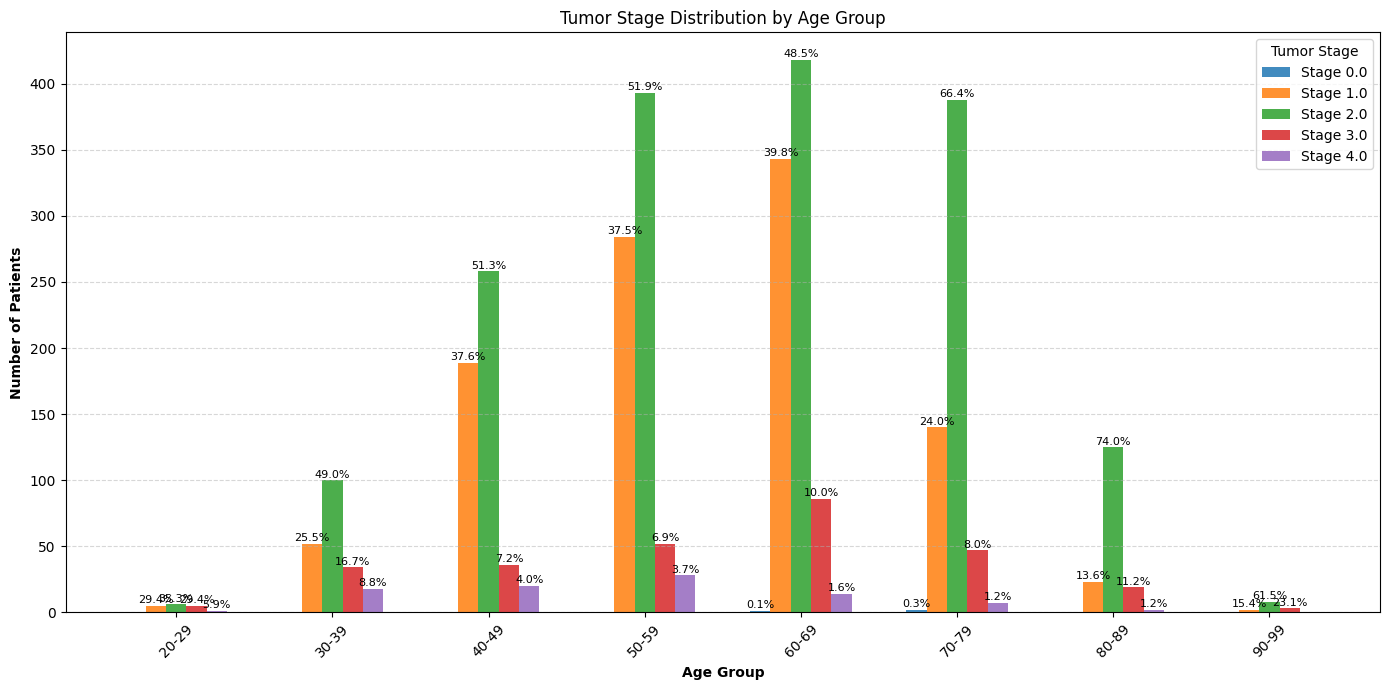

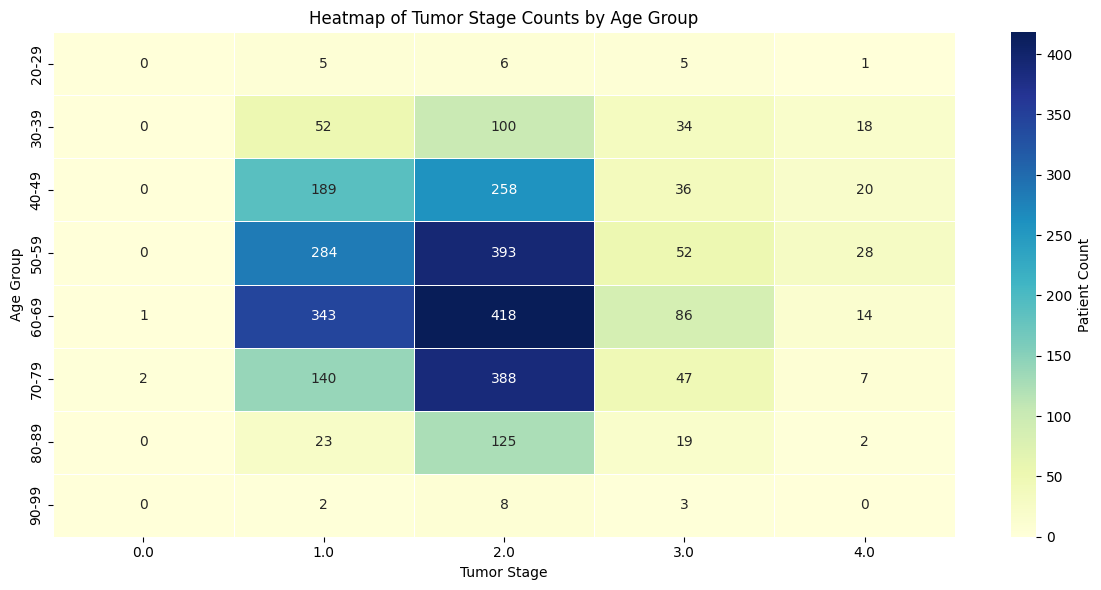

In [71]:
# Stage

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Convert 'Age at Diagnosis' to numeric and drop invalid rows
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age', 'Stage'])

# Define age bins and labels: 20–29, 30–39, ...
bins = list(range(20, int(df['Age'].max()) + 10, 10))
labels = [f"{i}-{i+9}" for i in bins[:-1]]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Grouping by AgeGroup and Tumor Stage
grouped = df.groupby(['AgeGroup', 'Stage']).size().unstack(fill_value=0)

# Plot: Grouped Bar Chart with Percentage Labels
plt.figure(figsize=(14, 7))
bar_width = 0.13
x = np.arange(len(grouped.index))
stages = grouped.columns.tolist()

for i, stage in enumerate(stages):
    counts = grouped[stage].values
    totals = grouped.sum(axis=1).values
    percentages = (counts / totals * 100).round(1)

    bars = plt.bar(x + i * bar_width, counts, width=bar_width, label=f'Stage {stage}', alpha=0.85)

    # Add percentage annotations
    for bar, perc in zip(bars, percentages):
        if bar.get_height() > 0:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                     f'{perc:.1f}%', ha='center', va='bottom', fontsize=8)

# Final formatting
plt.xticks(x + bar_width * (len(stages) - 1) / 2, grouped.index, rotation=45)
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Number of Patients', fontweight='bold')
plt.title('Tumor Stage Distribution by Age Group')
plt.legend(title='Tumor Stage')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print()
print()
print()
print()

# Plot: Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(grouped, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, linecolor='white', cbar_kws={'label': 'Patient Count'})
plt.title('Heatmap of Tumor Stage Counts by Age Group')
plt.xlabel('Tumor Stage')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


C:\Users\Md Shoaib\AppData\Local\Temp\ipykernel_8736\2676773587.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['AgeGroup', 'Grade (G)']).size().unstack(fill_value=0)


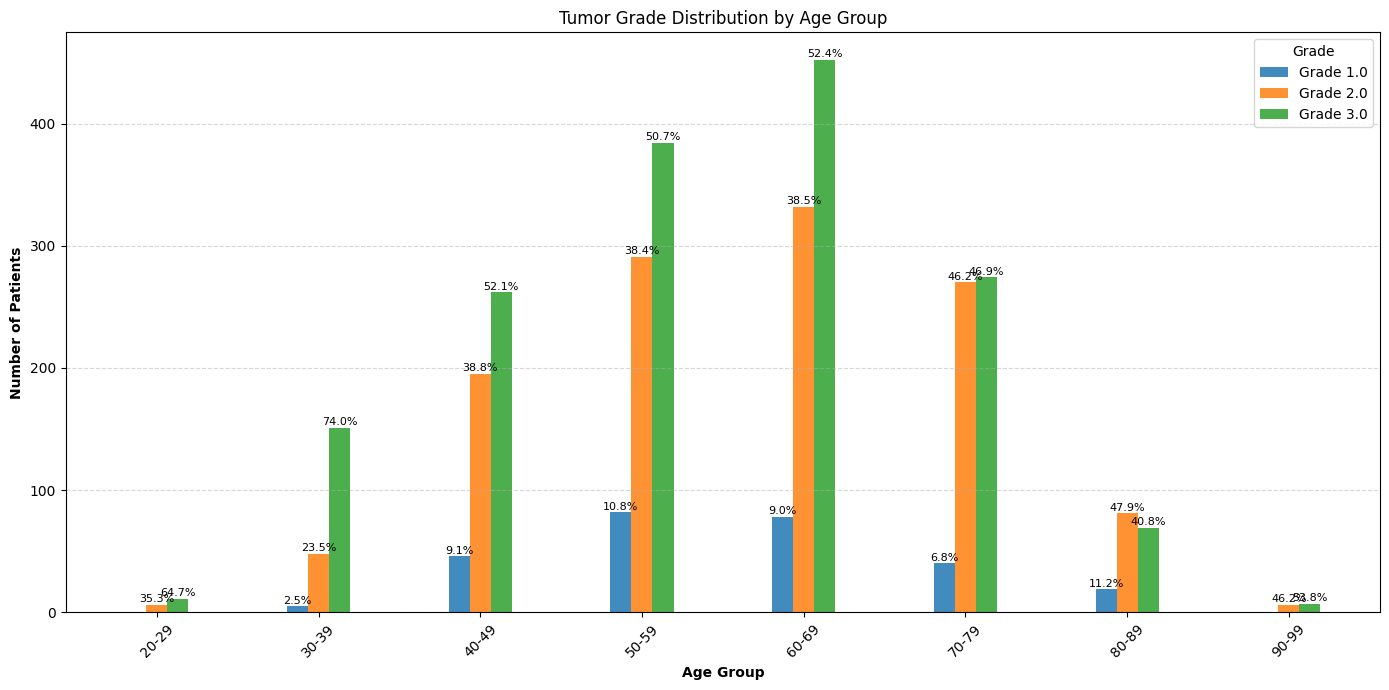

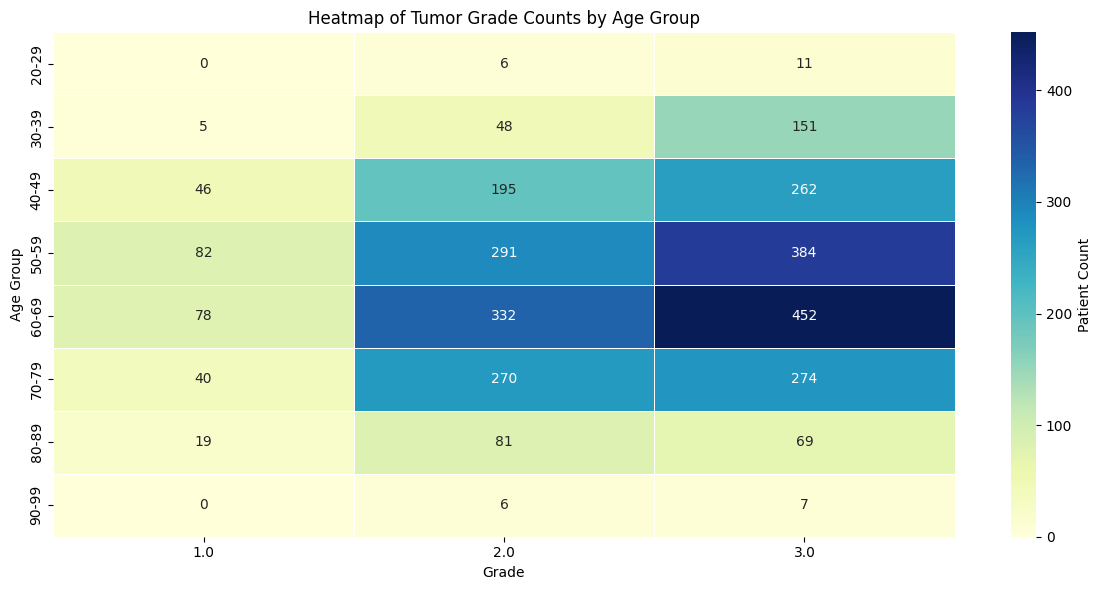

In [73]:
# Grade

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Convert 'Age at Diagnosis' to numeric and drop invalid entries
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age', 'Grade (G)'])

# Define age bins and labels (20–29, 30–39, ...)
bins = list(range(20, int(df['Age'].max()) + 10, 10))
labels = [f"{i}-{i+9}" for i in bins[:-1]]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Grouping by AgeGroup and Grade
grouped = df.groupby(['AgeGroup', 'Grade (G)']).size().unstack(fill_value=0)

# Plot: Grouped Bar Chart with Percentages
plt.figure(figsize=(14, 7))
bar_width = 0.13
x = np.arange(len(grouped.index))
grades = grouped.columns.tolist()

for i, grade in enumerate(grades):
    counts = grouped[grade].values
    totals = grouped.sum(axis=1).values
    percentages = (counts / totals * 100).round(1)

    bars = plt.bar(x + i * bar_width, counts, width=bar_width, label=f'Grade {grade}', alpha=0.85)

    # Percentage labels above bars
    for bar, perc in zip(bars, percentages):
        if bar.get_height() > 0:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                     f'{perc:.1f}%', ha='center', va='bottom', fontsize=8)

# Formatting
plt.xticks(x + bar_width * (len(grades) - 1) / 2, grouped.index, rotation=45)
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Number of Patients', fontweight='bold')
plt.title('Tumor Grade Distribution by Age Group')
plt.legend(title='Grade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


print()
print()
print()
print()


# Plot: Heatmap of Grade vs Age Group
plt.figure(figsize=(12, 6))
sns.heatmap(grouped, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, linecolor='white', cbar_kws={'label': 'Patient Count'})
plt.title('Heatmap of Tumor Grade Counts by Age Group')
plt.xlabel('Grade')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()
